# 데이터 전처리 

1. pandas
2. sklearn 이용
3. 심화

In [29]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'shirts'], 
                  ['red', 'L', 13.5, 'hat'], 
                  ['blue', 'XL', 15.3, 'shirts']], 
                  columns = ['color', 'size', 'price', 'category'])

df

,color,size,price,category
0,green,M,10.1,shirts
1,red,L,13.5,hat
2,blue,XL,15.3,shirts


In [30]:
# pandas로 데이터 전처리 category 열 변환

df_ = df.copy()

df_['category'] = df_['category'].map({'shirts' : 0, 'hat' : 1})

df_

# category가 많으면 불가능

,color,size,price,category
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [33]:
# sklearn로 데이터 전처리 category 열 변환
# 자동으로 Label을 변환해준다.

from sklearn.preprocessing import LabelEncoder # encoding 사람이 볼 수 있는걸 컴퓨터가 이해하도록 변환하는 것

df_ = df.copy()

le = LabelEncoder()

y = le.fit_transform(df_['category'].values) # fit 함수에 numpy 형태로 열을 넣어준다. 열의 종류를 확인 후 정보를 가진다. fit_transform하면 정보를 파악한 후 y를 반환한다.

df_['category'] = y

In [15]:
# label을 encoding한 것을 다시 사람이 볼 수 있게 decoding하기

le.inverse_transform(y) 

array(['shirts', 'hat', 'shirts'], dtype=object)

In [34]:
# 문제점 LabelEncoder는 순서를 마음대로 정한다.
# map함수를 써야한다.
'''
size_le = LabelEncoder()

df_['size'] = size_le.fit_transform(df_['size'].values)

df_
'''

df_['size'] = df_['size'].map({'M' : 0, 'L' : 1, 'XL' : 2})

df_

,color,size,price,category
0,green,0,10.1,1
1,red,1,13.5,0
2,blue,2,15.3,1


In [25]:
# one hot encoding : 1개만 1로 활성화
# one hot encoding 결과는 scaling을 하면 안된다. 
# data의 column이 종류 수만큼 늘어난다.

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output = False)
ohe.fit_transform(df_['color'].values.reshape(-1, 1))

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [38]:
# get_dummies
# 문제점
# 1.해당 특성(color) 종류가 많다면 열이 많이생기고 차원이 너무 올라간다. 특성의 종류가 많다면 그 열을 삭제하거나, 열을 축소(비슷한 종류는 하나로 묶음, 어렵다)
# 2.3가지 색을 표현하는데 2열이면 충분하다. drop_first = True 이용

X_df = pd.get_dummies(df_.iloc[:, :-1], drop_first = True)

X_df

,size,price,color_green,color_red
0,0,10.1,1,0
1,1,13.5,0,1
2,2,15.3,0,0


In [42]:
# scaling size는 min max, price는 standardscale, color은 X

import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
X1 = std_scaler.fit_transform(X_df.loc[:, ['price']]) # X_df['price'] 는 시리즈, dataframe 형태로 전달, 열이 하나일 때는 X_df['price'].values.reshape(-1, 1) 도 가능

mm_scaler = MinMaxScaler()
X2 = mm_scaler.fit_transform(X_df.loc[:, ['size']]) # 범위를 0, 0.5, 1로 축소

X3 = X_df.loc[:, 'color_green':'color_red'].values # ['color_green', 'color_red'] / 'color_green':

X = np.concatenate([X1, X2, X3], axis = 1)
X

array([[-1.32954369,  0.        ,  1.        ,  0.        ],
       [ 0.24735697,  0.5       ,  0.        ,  1.        ],
       [ 1.08218672,  1.        ,  0.        ,  0.        ]])

In [44]:
# 다수케이스 희귀케이스 극심한 경우
# 모델이 학습할 때 다수에비해 소수가 너무 적으면 소수를 정상으로 판단해도 손실함수에 영향을 못 미친다.
# 해결방법
# 1. 다운 샘플링 down sampling, 언더 샘플링 under sampling
# 메이저 클래스를 소수 클래스와 같은 비율로 랜덤하게 뽑아서 사용

# !pip install imbalanced-learn 설치



     ---------------------------------------- 0.0/226.0 kB ? eta -:--:--
     -------------------------------------- 226.0/226.0 kB 7.0 MB/s eta 0:00:00


In [6]:
# under sampling 실습
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 10000, n_features = 5, weights = [0.99], flip_y = 0, random_state = 1)

In [7]:
np.unique(y, return_counts = True)

(array([0, 1]), array([9900,  100], dtype=int64))

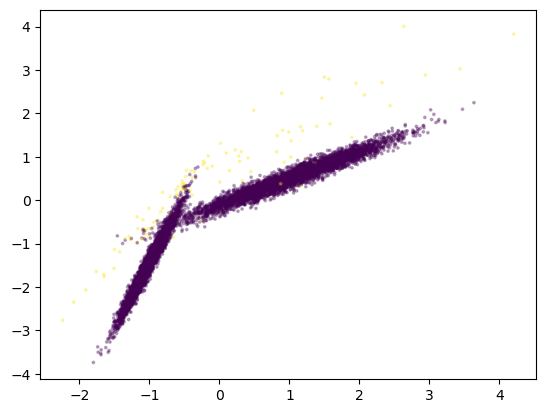

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = y, s = 3, alpha = 0.3)
plt.show()

(array([0, 1]), array([100, 100], dtype=int64))


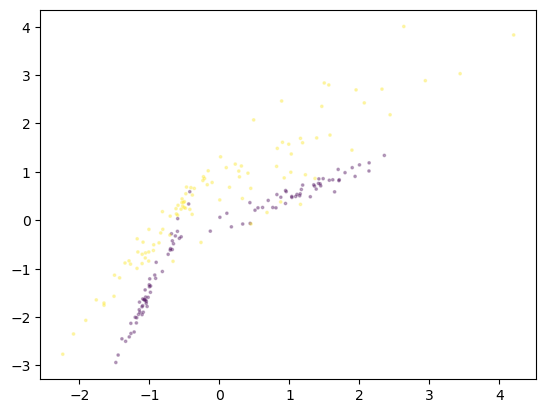

In [9]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(sampling_strategy = 'majority') # major 클래스를 minor 클래스와 맞춘다.
X_sp, y_sp = sampler.fit_resample(X, y)

print(np.unique(y_sp, return_counts = True))

plt.figure()
plt.scatter(X_sp[:, 0], X_sp[:, 1], c = y_sp, s = 3, alpha = 0.3)
plt.show()

(array([0, 1]), array([500, 100], dtype=int64))


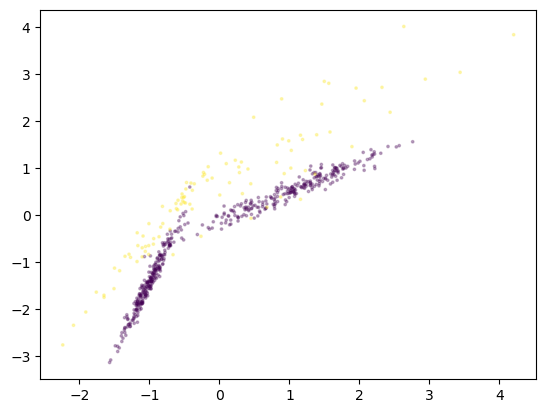

In [12]:
sampler = RandomUnderSampler(sampling_strategy = 0.2) # minor를 major로 나눈 값에 맞춰서 under sampling
X_sp, y_sp = sampler.fit_resample(X, y)

print(np.unique(y_sp, return_counts = True))

plt.figure()
plt.scatter(X_sp[:, 0], X_sp[:, 1], c = y_sp, s = 3, alpha = 0.3)
plt.show()

(array([0, 1]), array([9900, 9900], dtype=int64))


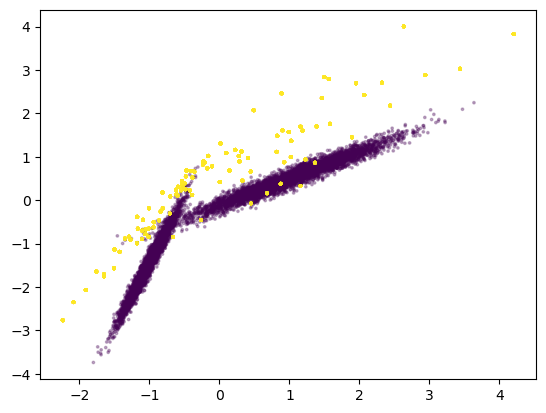

In [13]:
# 오버 샘플링 mino 클래스를 major 클래스에 맞춰 늘리는것

from imblearn.over_sampling import RandomOverSampler, SMOTE

sampler = RandomOverSampler(sampling_strategy = 'minority') # minor를 major만큼 맞춰주는 것, 복원 추출(랜덤하게 뽑은걸 또 뽑고 반복, 복사 붙여넣기) 하나만 틀려도 손실함수가 엄청 커진다.
X_sp, y_sp = sampler.fit_resample(X, y)

print(np.unique(y_sp, return_counts = True))

plt.figure()
plt.scatter(X_sp[:, 0], X_sp[:, 1], c = y_sp, s = 3, alpha = 0.3)
plt.show()

(array([0, 1]), array([9900, 4950], dtype=int64))


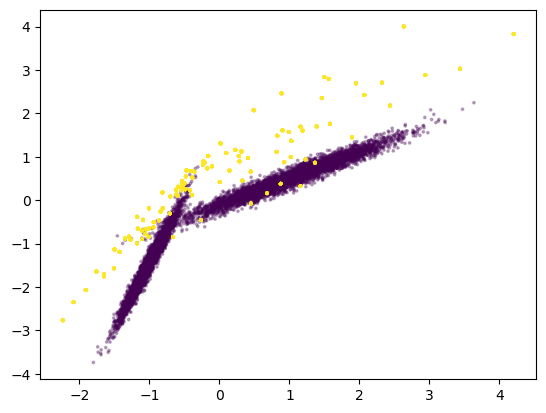

In [15]:
sampler = RandomOverSampler(sampling_strategy = 0.5) # minor를 major로 나눈 값만큼 oversampling
X_sp, y_sp = sampler.fit_resample(X, y)

print(np.unique(y_sp, return_counts = True))

plt.figure()
plt.scatter(X_sp[:, 0], X_sp[:, 1], c = y_sp, s = 3, alpha = 0.3)
plt.show()

(array([0, 1]), array([9900, 1980], dtype=int64))


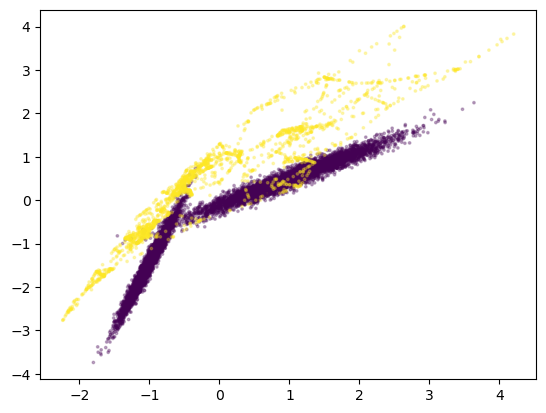

In [20]:
# SMOTE : 샘플들 사이 사이의 공간에 샘플을 만들어 채우는 방식, 서로 어느정도 근접하며 사이가 비어있는 샘플들 사이의 거리를 구해서 보강
# 주의할점 : 사람 수같이 사이값이 없는 샘플들의 사이값을 만들어 버린다. 
# 해결책 : 1사람에 대해 SMOTE, 2사람에 대해 SMOTE ... 다 따로 SMOTE를 해준다.

sampler = SMOTE(sampling_strategy = 0.2) # 
X_sp, y_sp = sampler.fit_resample(X, y)

print(np.unique(y_sp, return_counts = True))

plt.figure()
plt.scatter(X_sp[:, 0], X_sp[:, 1], c = y_sp, s = 3, alpha = 0.3)
plt.show()

In [ ]:
# 머신러닝실습